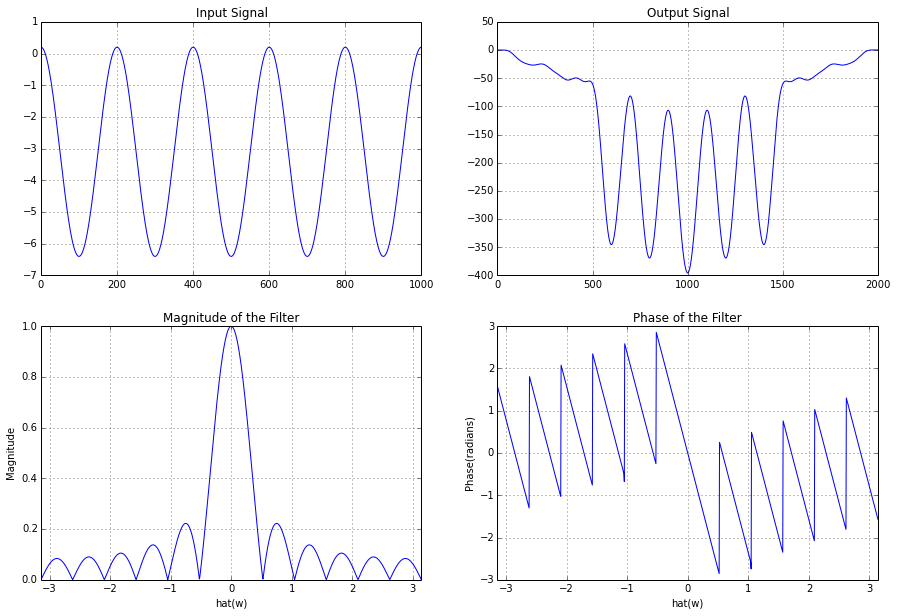

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.display import display
from scipy import signal

lims = (-10.0,10.0,0.1)
l_lims = (0, 30, 1)

def plotfilter(d = 0, a = 1, l = 11):
    ##### input signal ######
    t = np.arange(0, 1, 0.001)
    data = d + a*np.cos(2*np.pi*5*t)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(221)
    #ax.hold(False)
    plt.plot(data)
    plt.title('Input Signal')
    plt.grid()
    
    ##### magnitude and phase ######
    #l = self.SetFilter()
    w, h = signal.freqz(np.array([1] * l)/ float(l), 1, worN=np.linspace(-np.pi, np.pi, 1000))
    mag = fig.add_subplot(223)
    #mag.hold(False)
    plt.plot(w, abs(h))
    plt.xlabel('hat(w)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude of the Filter')
    plt.grid()
    plt.xlim(np.min(w), np.max(w))

    pha = fig.add_subplot(224)
    #pha.hold(False)
    plt.plot(w, np.angle(h))
    plt.xlabel('hat(w)')
    plt.ylabel('Phase(radians)')
    plt.title('Phase of the Filter')
    plt.grid()
    plt.xlim(np.min(w), np.max(w))        
    #self.canvas.draw()

    ##### output signal ######
    z = signal.convolve(data, h)
    output = fig.add_subplot(222)
    #output.hold(False)
    plt.plot(z)
    plt.title('Output Signal')
    plt.grid()        
    #self.canvas.draw()


w=interactive(plotfilter, d = lims, a = lims, l = l_lims)
display(w)

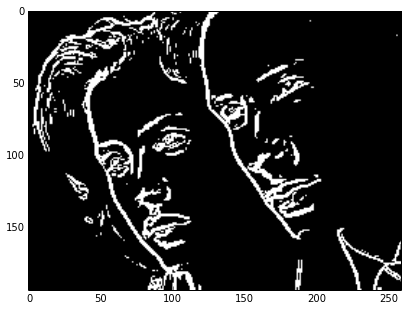

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import lena
import scipy.ndimage as nd
import scipy.misc as misc
from IPython.html.widgets import interactive
from IPython.display import display

#src_image = lena()
src_image = misc.imread('X.jpg', 1)

c_lims = (100,500,10)
s_lims = (1, 10, 0.1)

def plotfilter(canny = 255, sigma = 3):
    sx = nd.sobel(src_image, axis=0)
    sy = nd.sobel(src_image, axis=1)
    sob = np.sqrt(sx*sx + sy*sy)
    sobmfed = nd.median_filter((sob> canny * 0.5), sigma)
    plt.figure(figsize=[15,5])
    plt.imshow(sobmfed, cmap=plt.cm.gray)

    
w=interactive(plotfilter, canny = c_lims, sigma = s_lims)
display(w)